In [1]:
import pandas as pd
import sklearn.model_selection
df = pd.read_csv('Comp Sci Project - Sheet3.csv')
df.head()

,Name,Grade,Age (In Years),Height (in feet)
0,Kylee Hung,10th,16,5'3
1,Sevan Toufayan,10th,16,5'7
2,Emma Lopez,10th,15,5'0
3,Hannah Pappalardo,10th,16,5'8
4,Sophie Gutter,10th,16,5'3


In [2]:
# Convert height from feet and inches to total inches
def convert_to_inches(height_str):
    feet, inches = height_str.split("'")
    return int(feet) * 12 + int(inches)

# Create new column with heights in inches
df['Height (in inches)'] = df['Height (in feet)'].apply(convert_to_inches)

# Display the updated DataFrame
df.head()

,Name,Grade,Age (In Years),Height (in feet),Height (in inches)
0,Kylee Hung,10th,16,5'3,63
1,Sevan Toufayan,10th,16,5'7,67
2,Emma Lopez,10th,15,5'0,60
3,Hannah Pappalardo,10th,16,5'8,68
4,Sophie Gutter,10th,16,5'3,63


In [3]:
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
# For this example, let's use Age and Height as features
X = df[['Age (In Years)', 'Height (in inches)']]
y = df['Grade']  # Using Grade as the target variable

# Create train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Display first few rows of training data
print("\nTraining data preview:")
print(X_train.head())
print("\nTraining labels preview:")
print(y_train.head())

Training set shape: (40, 2)
Testing set shape: (10, 2)

Training data preview:
    Age (In Years)  Height (in inches)
12              17                  66
4               16                  63
37              14                  60
8               16                  69
3               16                  68

Training labels preview:
12    11th
4     10th
37     8th
8     10th
3     10th
Name: Grade, dtype: object


/var/folders/gy/z3sbf1rj41b8wpvz_cf_3t380000gn/T/ipykernel_21988/1393944417.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


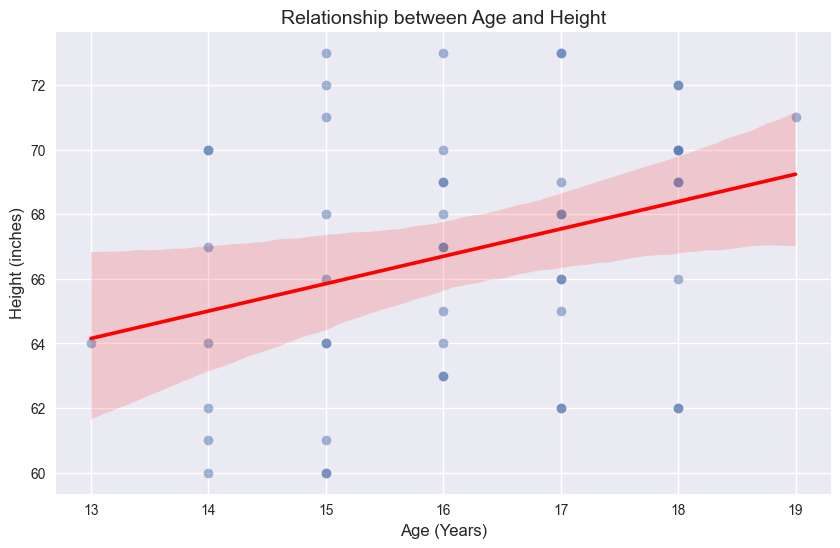

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
plt.style.use('seaborn')

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age (In Years)', y='Height (in inches)', 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

# Add labels and title
plt.title('Relationship between Age and Height', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Height (inches)', fontsize=12)

# Show the plot
plt.show()

In [5]:
# Calculate the line of best fit using numpy's polyfit
import numpy as np

# Get coefficients (slope and intercept) of the line of best fit
slope, intercept = np.polyfit(df['Age (In Years)'], df['Height (in inches)'], 1)

print(f"Line of Best Fit Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"Where:")
print(f"y = Height (inches)")
print(f"x = Age (Years)")


Line of Best Fit Equation: y = 0.85x + 53.14
Where:
y = Height (inches)
x = Age (Years)


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare X (features) and y (target)
X = df[['Age (In Years)']]
y = df['Height (in inches)']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print(f"Linear Regression Equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")
print(f"Where:")
print(f"y = Height (inches)")
print(f"x = Age (Years)")

# Create scatter plot with training and test data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.5, label='Testing Data')

# Plot regression line
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')

plt.title('Age vs Height - Training and Testing Sets', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Height (inches)', fontsize=12)
plt.legend()
plt.show()

# Calculate and print R-squared score
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"\nR-squared score (training): {train_score:.4f}")
print(f"R-squared score (testing): {test_score:.4f}")


NameError: name 'df' is not defined